In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [13]:
def detect_colors_and_count(image_path):
    # Baca gambar
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Rentang warna merah
    lower_red1 = np.array([0, 120, 70])
    upper_red1 = np.array([10, 255, 255])
    lower_red2 = np.array([170, 120, 70])
    upper_red2 = np.array([180, 255, 255])

    # Rentang warna kuning
    lower_yellow = np.array([20, 100, 100])
    upper_yellow = np.array([30, 255, 255])

    # Rentang warna biru
    lower_blue = np.array([100, 150, 0])
    upper_blue = np.array([140, 255, 255])

    # Masker untuk warna merah
    mask_red1 = cv2.inRange(hsv_image, lower_red1, upper_red1)
    mask_red2 = cv2.inRange(hsv_image, lower_red2, upper_red2)
    mask_red = cv2.bitwise_or(mask_red1, mask_red2)

    # Masker untuk warna kuning
    mask_yellow = cv2.inRange(hsv_image, lower_yellow, upper_yellow)

    # Masker untuk warna biru
    mask_blue = cv2.inRange(hsv_image, lower_blue, upper_blue)

    # Menghitung jumlah objek
    num_red, _ = cv2.connectedComponents(mask_red)
    num_yellow, _ = cv2.connectedComponents(mask_yellow)
    num_blue, _ = cv2.connectedComponents(mask_blue)

    # Mengurangi 1 karena background dihitung
    num_red -= 1
    num_yellow -= 1
    num_blue -= 1

    return image_rgb, mask_red, mask_yellow, mask_blue, num_red, num_yellow, num_blue

In [14]:
def display_results(image_rgb, mask_red, mask_yellow, mask_blue, num_red, num_yellow, num_blue):
    plt.figure(figsize=(15, 10))

    plt.subplot(2, 3, 1)
    plt.imshow(image_rgb)
    plt.title("Gambar Asli")

    plt.subplot(2, 3, 2)
    plt.imshow(mask_red, cmap='gray')
    plt.title(f"Deteksi Warna Merah: {num_red} objek")

    plt.subplot(2, 3, 3)
    plt.imshow(mask_yellow, cmap='gray')
    plt.title(f"Deteksi Warna Kuning: {num_yellow} objek")

    plt.subplot(2, 3, 4)
    plt.imshow(mask_blue, cmap='gray')
    plt.title(f"Deteksi Warna Biru: {num_blue} objek")

    plt.show()

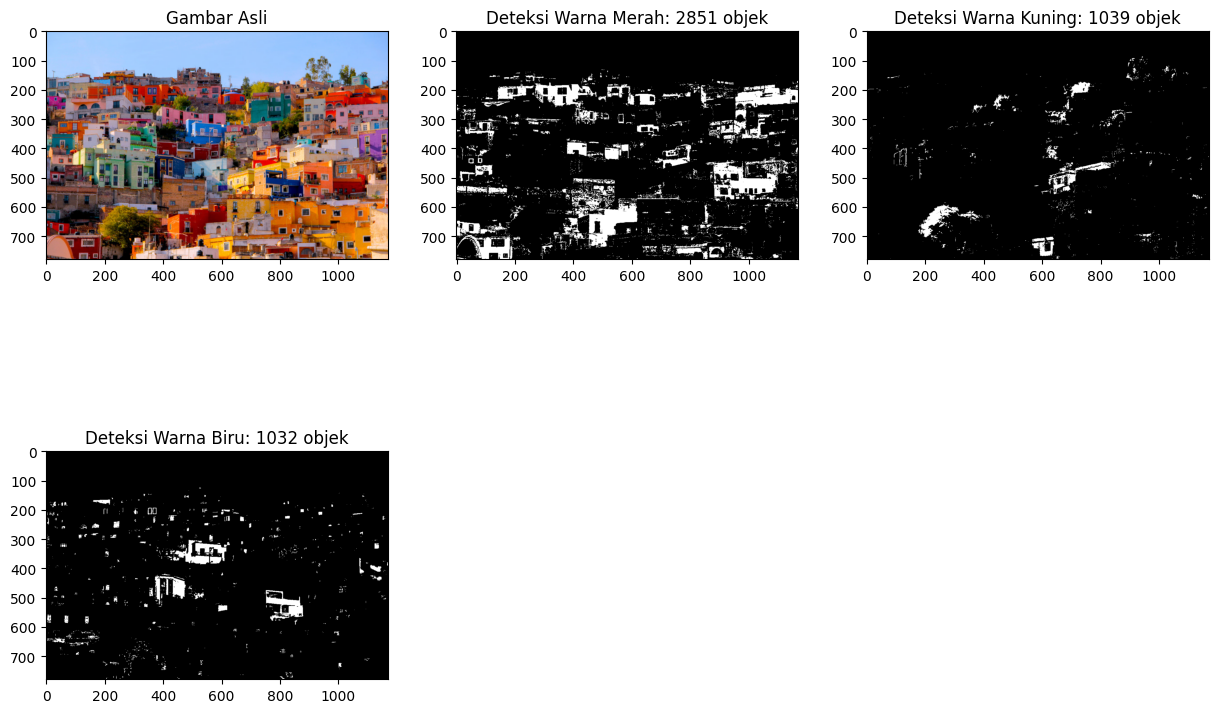

In [15]:
image_path = 'image.jpg'

# Deteksi warna dan hitung jumlah objek
image_rgb, mask_red, mask_yellow, mask_blue, num_red, num_yellow, num_blue = detect_colors_and_count(image_path)

# Tampilkan hasil
display_results(image_rgb, mask_red, mask_yellow, mask_blue, num_red, num_yellow, num_blue)